In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## A glimpse of how the dataframe looks like
### Frame cosists of 508 samples labeled 'True' and 500 samples labeled 'False'

In [134]:
movie_frame = pd.read_csv('movie_frame.csv')
print(Counter(movie_frame['outcome']))
movie_frame.tail()

Counter({True: 508, False: 500})


,title,year,director,actors,critic_rating,user_rating,rating_diff,rating_diff_abs,keywords,outcome
1003,Shadow of a Doubt,1943,Alfred Hitchcock,"Teresa Wright,Joseph Cotten,Macdonald Carey,He...",94.0,79.0,-15.0,15.0,"murderer,serial killer,amateur detective,psych...",True
1004,Spindesys,1996,Scott Hicks,"Geoffrey Rush,Justin Braine,Sonia Todd,Chris H...",87.0,77.0,-10.0,10.0,"piano,pianist,australia,abuse,concert,concert ...",False
1005,Take This Waltz,2011,Sarah Polley,"Michelle Williams,Seth Rogen,Luke Kirby,Sarah ...",68.0,66.0,-2.0,2.0,"actress breaking typecast,husband wife relatio...",True
1006,Yosemite,2015,Gabrielle Demeestere,"James Franco,Everett Meckler,Troy Tinnirello,C...",59.0,48.0,-11.0,11.0,"f rated,grazed by bullet,grazed by a bullet,bu...",False
1007,The Sisters Brothers,2018,Jacques Audiard,"John C. Reilly,Joaquin Phoenix,Jake Gyllenhaal...",78.0,72.0,-6.0,6.0,"thieves on the run,shootout,brother brother re...",True


## EDA on the numerical part of data 

In [133]:
#extracting the numeric data from the dataframe
num_data = movie_frame[['critic_rating', 'user_rating', 'rating_diff', 'rating_diff_abs','outcome']]


### From the violin plots below it is visible that preferred movies have a tendency to have higher both critic rating and user rating. in addition, critic rating has lower variability for positive outcome movies

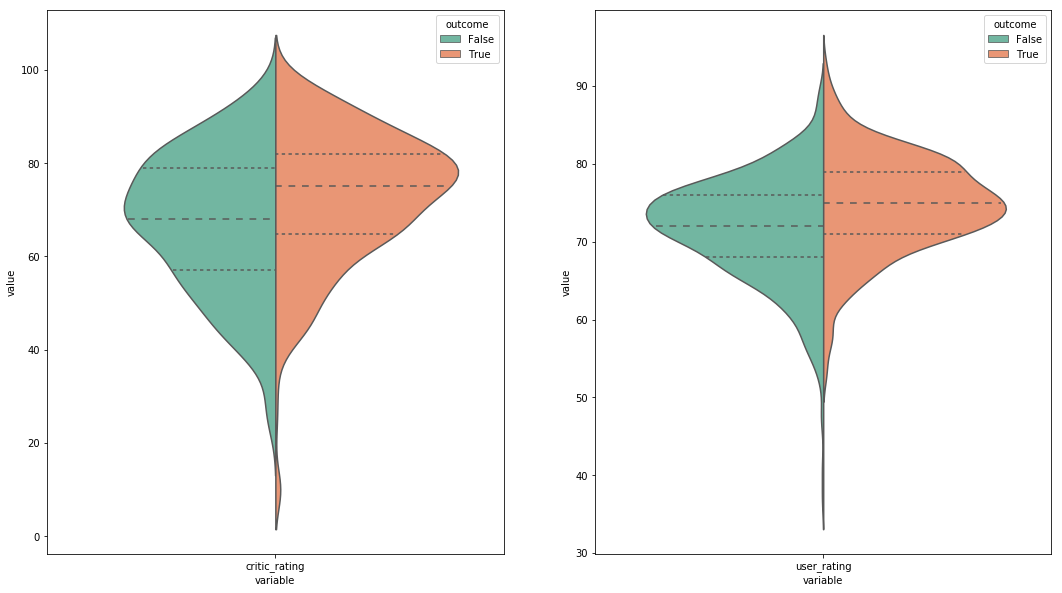

In [6]:
vp1 = pd.melt(num_data, id_vars='outcome', value_vars=['critic_rating'])
vp2 = pd.melt(num_data, id_vars='outcome', value_vars=['user_rating'])

fig, ax = plt.subplots(1,2, figsize=(18,10))
sns.violinplot(x='variable', y='value', hue='outcome', split=True, inner='quartile', palette="Set2", data=vp1, ax=ax[0])
sns.violinplot(x='variable', y='value', hue='outcome', split=True, inner='quartile', palette="Set2", data=vp2, ax=ax[1]);

## Rating difference between "True" outcome movies and "False" outcome movies also differs a little bit.
    
### First plot indicates that even though the positive outcome movies have move skewed to the left rating_difference and the medians are rather close to one another but there's still a tendency that positive sentiment movies have higher critic rating than user compared to the negative sentiment movies because the mode is a negative number

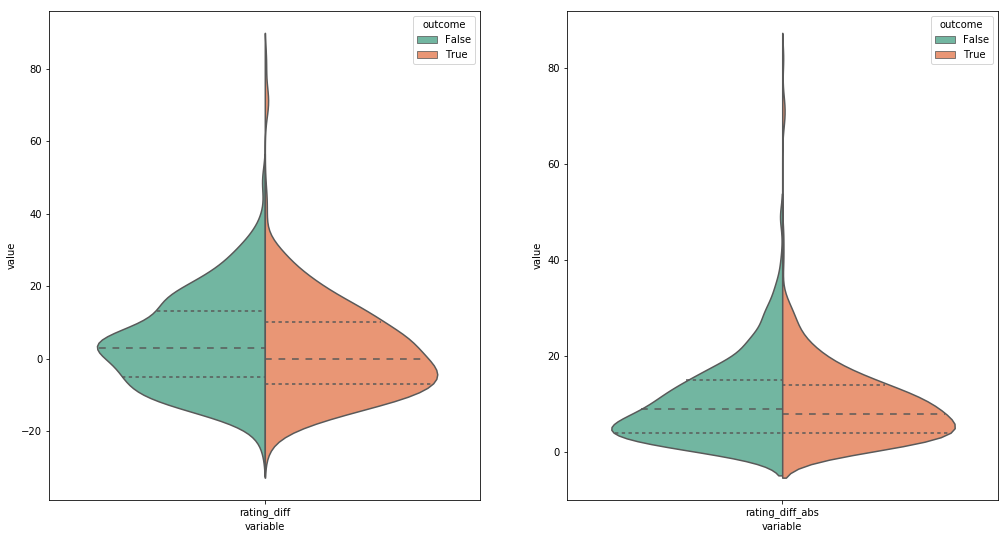

In [7]:
vp3 = pd.melt(num_data, id_vars='outcome', value_vars=['rating_diff'])
vp4 = pd.melt(num_data, id_vars='outcome', value_vars=['rating_diff_abs'])

fig, ax = plt.subplots(1,2, figsize=(17,9))
sns.violinplot(x='variable', y='value', hue='outcome', split=True, inner='quartile', palette="Set2", data=vp3, ax=ax[0])
sns.violinplot(x='variable', y='value', hue='outcome', split=True, inner='quartile', palette="Set2", data=vp4, ax=ax[1])

## Below are graphs for visualisizngthe relationships between the numeric data and whether there is any separation between positive sentiment and negative sentiment samples
### The scatterplots are quite overlapping but there's barely visible blue dots clustering(meaning positive outcome movies) as opposed to the red ones both in first and second pictures where high critic rating movies have less negative difference with user rating, meaning positive outcome movies have either more simiar rating between critics and users or less of a difference between those two measures and if there is a difference, the tendency is for it to be more negative than positive. The last visual also shows higher concentration of blue in the first tail. This information would correspond with the violin plot above.

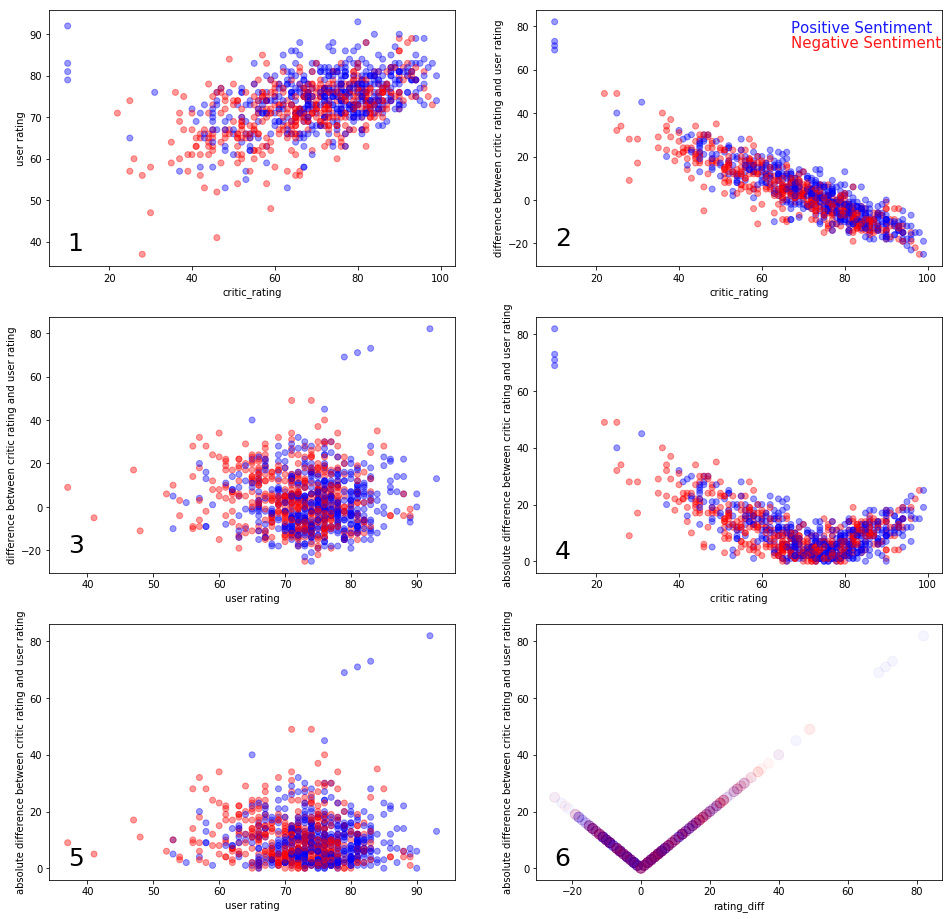

In [21]:
fig, ax = plt.subplots(3,2, figsize=(16,16)) 
colors1 = {True:'blue', False:'red'}

ax[0,0].scatter(num_data['critic_rating'], num_data['user_rating'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[0,0].set_xlabel('critic_rating')
ax[0,0].set_ylabel('user rating')
ax[0,0].text(10,38,'1',fontsize=25)

ax[0,1].scatter(num_data['critic_rating'], num_data['rating_diff'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[0,1].set_xlabel('critic_rating')
ax[0,1].set_ylabel('difference between critic rating and user rating')
ax[0,1].text(10,-21,'2',fontsize=25)
ax[0,1].text(67, 77, 'Positive Sentiment', color='b', fontsize=15, alpha=0.9)
ax[0,1].text(67, 70, 'Negative Sentiment', color='r', fontsize=15, alpha=0.9)

ax[1,0].scatter(num_data['user_rating'], num_data['rating_diff'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[1,0].set_xlabel('user rating')
ax[1,0].set_ylabel('difference between critic rating and user rating')
ax[1,0].text(37,-21,'3',fontsize=25)

ax[1,1].scatter(num_data['critic_rating'], num_data['rating_diff_abs'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[1,1].set_xlabel('critic rating')
ax[1,1].set_ylabel('absolute difference between critic rating and user rating')
ax[1,1].text(10,1,'4',fontsize=25)

ax[2,0].scatter(num_data['user_rating'], num_data['rating_diff_abs'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[2,0].set_xlabel('user rating')
ax[2,0].set_ylabel('absolute difference between critic rating and user rating')
ax[2,0].text(37,1,'5',fontsize=25)

ax[2,1].scatter(num_data['rating_diff'], num_data['rating_diff_abs'], color=num_data['outcome'].apply(lambda x: colors1[x]),s=100, alpha=0.04)
ax[2,1].set_xlabel('rating_diff')
ax[2,1].set_ylabel('absolute difference between critic rating and user rating')
ax[2,1].text(-25,1,'6',fontsize=25);

### Trying out both the t-Distributed Stochastic Neighbor Embedding  and PCA fot visualising if there is some division between the whole numeric data with true outcome versus false outcome.
### As the picture below shows there is some sort division between True and False outcome numeric data but the clustering after dimention reduction is not too clearly perceptible.

In [28]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

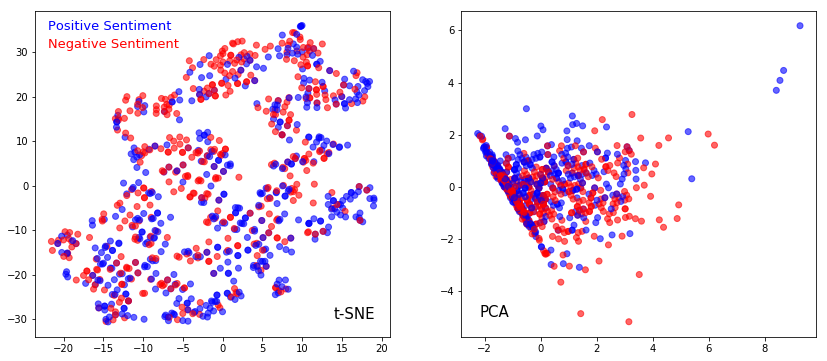

In [50]:
x_nonull = num_data.loc[num_data['critic_rating'].notnull()] #eliminating null values, losing almost 100 samples
x_num = x_nonull[['critic_rating', 'user_rating', 'rating_diff', 'rating_diff_abs']].values
x_num_scaled = StandardScaler().fit_transform(x_num) #normalizing the data 
y_num = x_nonull[['outcome']].values

pca_result = PCA(n_components=2).fit_transform(x_num_scaled)
tsne = TSNE(n_components=2, perplexity=40, n_iter=500)
tsne_result = tsne.fit_transform(x_num_scaled)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
colors = {True:'blue', False:'red'}

ax1.scatter([i[0] for i in tsne_result], [i[1] for i in tsne_result], color=x_nonull['outcome'].apply(lambda x: colors[x]), alpha=0.6)
ax1.text(14,-30,'t-SNE',fontsize=15)
ax1.text(-22,35,'Positive Sentiment', color='b', fontsize=13)
ax1.text(-22,31,'Negative Sentiment', color='r', fontsize=13);

ax2.scatter([i[0] for i in pca_result], [i[1] for i in pca_result], color=x_nonull['outcome'].apply(lambda x: colors[x]), alpha=0.6)
ax2.text(-2.2,-5,'PCA',fontsize=15);

## Applying SVM algorithm as a classification model
##### from model evaluation it is seen that True outcome can be predicted with a 74% accuracy, False outcome however - only 65%

In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC  
from sklearn.metrics import classification_report
 
X = x_num_scaled
Y = np.ravel(y_num.astype(int))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)  


svclassifier = SVC(kernel='rbf', gamma='auto')  
svclassifier.fit(x_train, y_train)
ySVM_prediction = svclassifier.predict(x_test)
 
print(classification_report(y_test,ySVM_prediction))  

              precision    recall  f1-score   support

           0       0.71      0.65      0.68        68
           1       0.68      0.74      0.71        70

   micro avg       0.70      0.70      0.70       138
   macro avg       0.70      0.69      0.69       138
weighted avg       0.70      0.70      0.69       138



## Preparing to visualise actors and directors by the two sentiments:

In [67]:
outcomes = movie_frame['outcome'].values
#since every movie has a list of actors, I need to separate each actor from the list:
actors = [i.split(',') for i in movie_frame['actors'].values] 

actors_values = [] #the list will be filled with an actor ant their outcome for each movie they are in
for n in range(len(actors)):
    a_v = [actors[n], outcomes[n]] #re-joining the actors with their outcome
    for i in range(len(a_v[0])):
        actors_values.append([a_v[0][i],a_v[1]])
actor_frame = pd.DataFrame(actors_values, columns=['actor', 'outcome']) #actor and outcome dataframe

#adding count column for each actor for the number of times they appeared in the the movies dataset
actor_frame['count'] = actor_frame.groupby(['actor'])['outcome'].transform('count') 
#will be visualising the actors that appeared in 10 and more movies
actor_frame = actor_frame.loc[actor_frame['count']>9]

In [68]:
import pixiedust 
pixiedust.display(actor_frame)

## Actors that appeared in 10 or more movies and the sentiment they carry based on the movie outcome
#### (visual of the graph that should have been visible above )

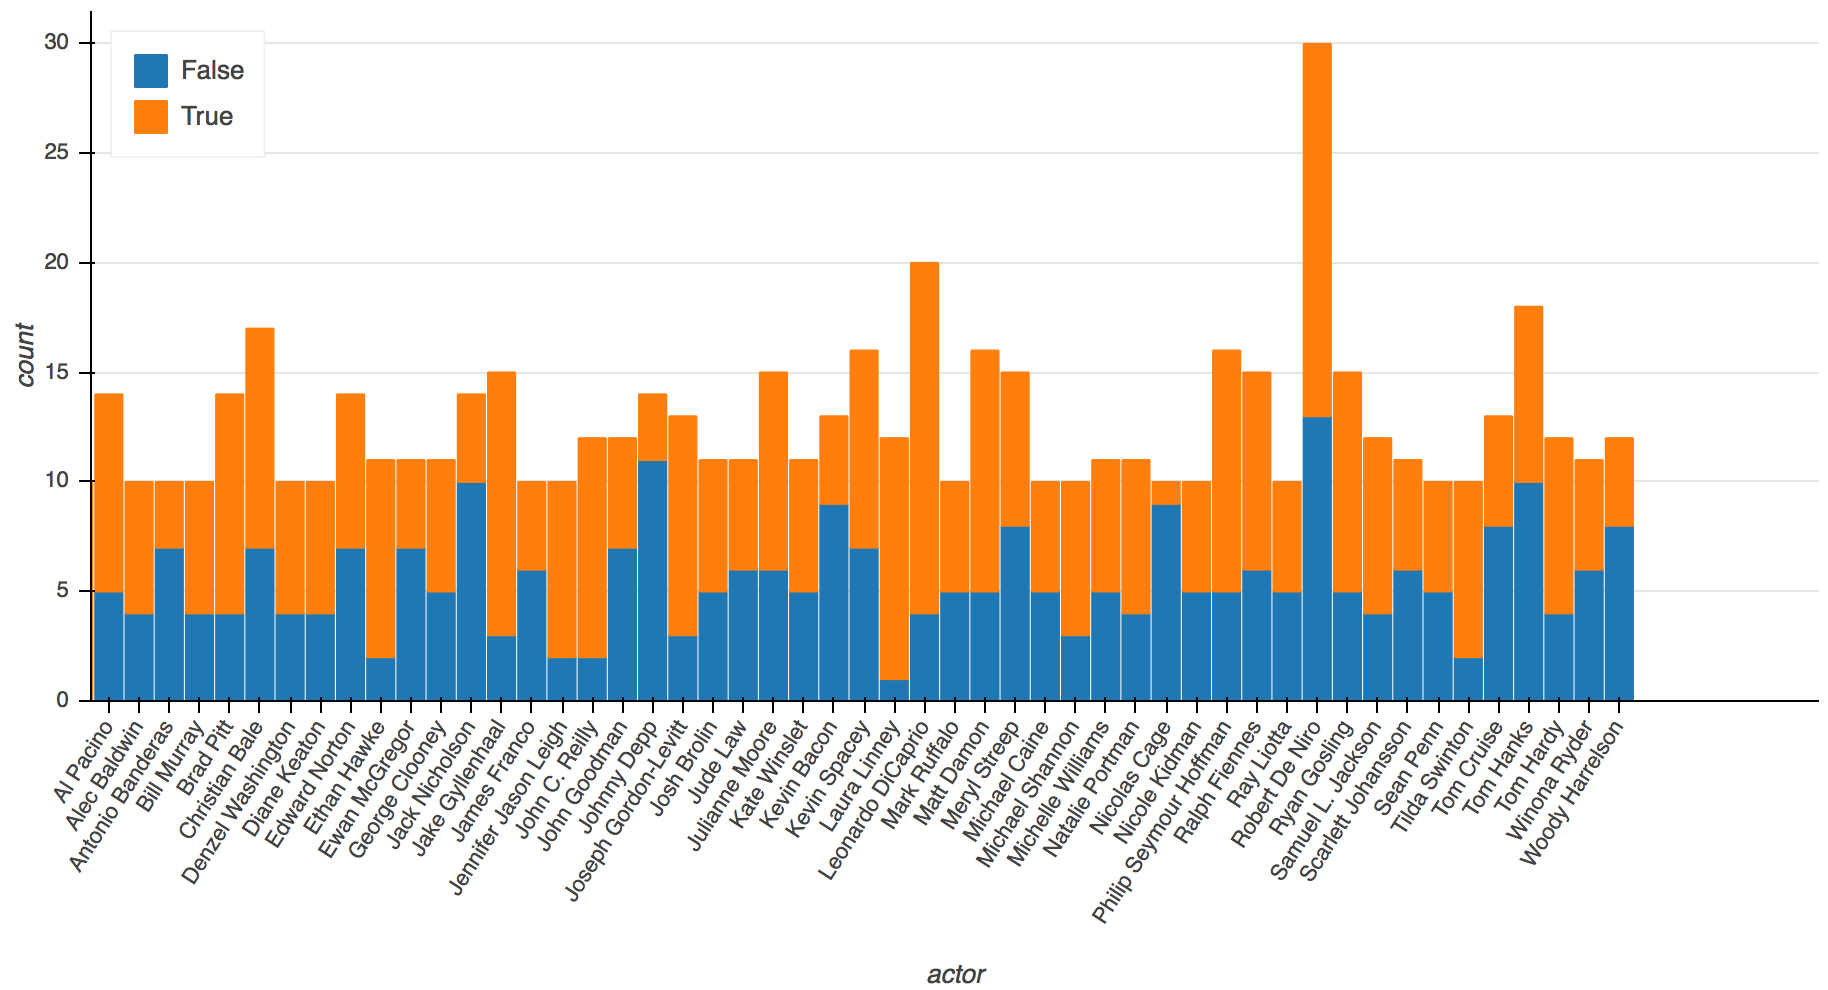

## Directors that appeared in 4 or more movies and the sentiment they carry based on the movies they directed 
#### the graph shows the strongest positive sentiment to Quentin Tarnatino, Dennis Villenueve, Martin Scorsese, Noah Baumach, Richard Linklater, Terrence Malick, Woody Allen

In [ ]:
director_frame = movie_frame[['director', 'outcome']]
director_frame['count'] = director_frame.groupby(['director'])['outcome'].transform('count')
 
pixiedust.display(director_frame)

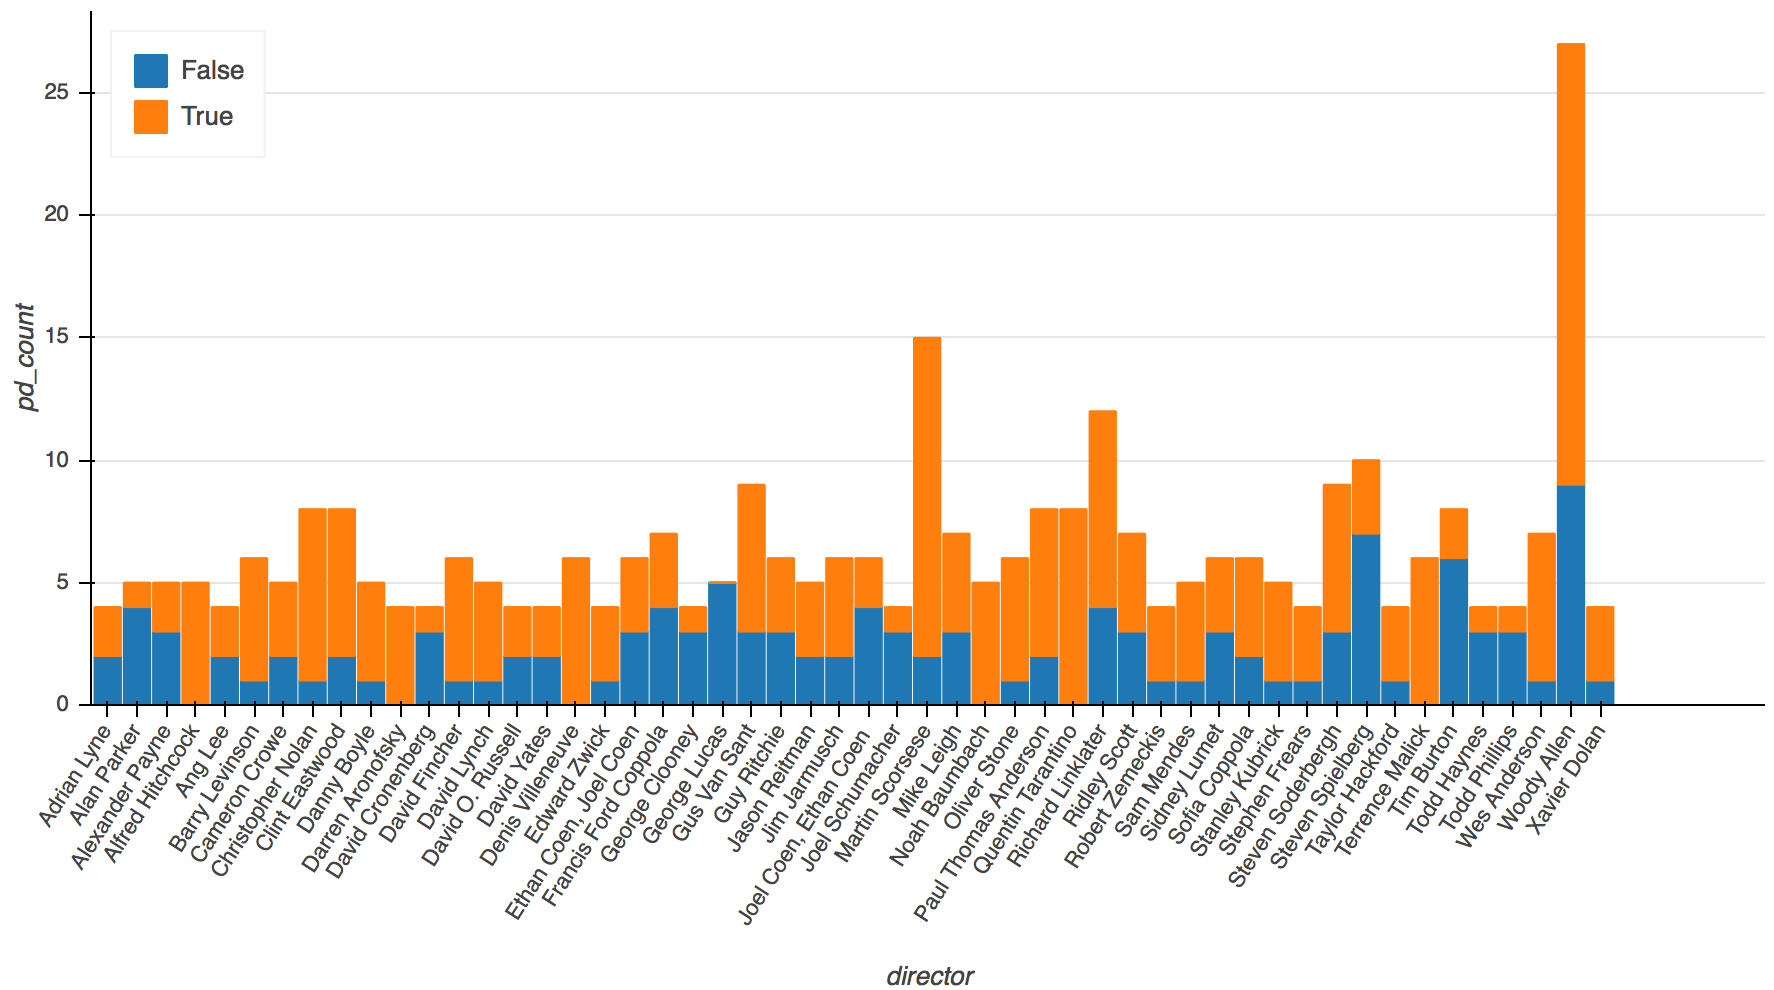

## Keyword visualization and analysis

In [73]:
#extract the list of keywords and outcome related to them
keywords = movie_frame['keywords'].values
outcome = movie_frame['outcome'].astype(int)

#splitting the keywords to separate strings, making all words lower-case and eliminating those samples that have very few keywords
keywords_lower = []
outcome_l = []
for i,e in zip(keywords,outcome):
    t0 = i.split(',')
    t = [w.lower() for w in t0] 
    if len(t)>10:
        keywords_lower.append(t)
        outcome_l.append(e)

### Trying to figure out if recurrent keywords are somewhat exclusive for either True or False outcome of a movie.
    
### However this didn't help much, both positive and negative sentiment movies mostly have recurring theme of death and relationships. Black background graph is for False outcome movies and white for True.

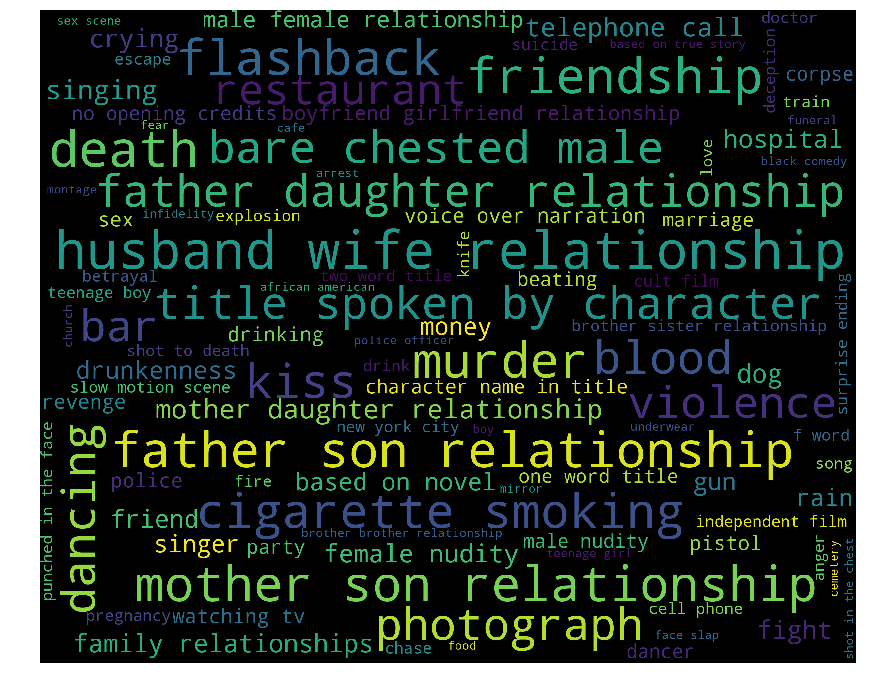

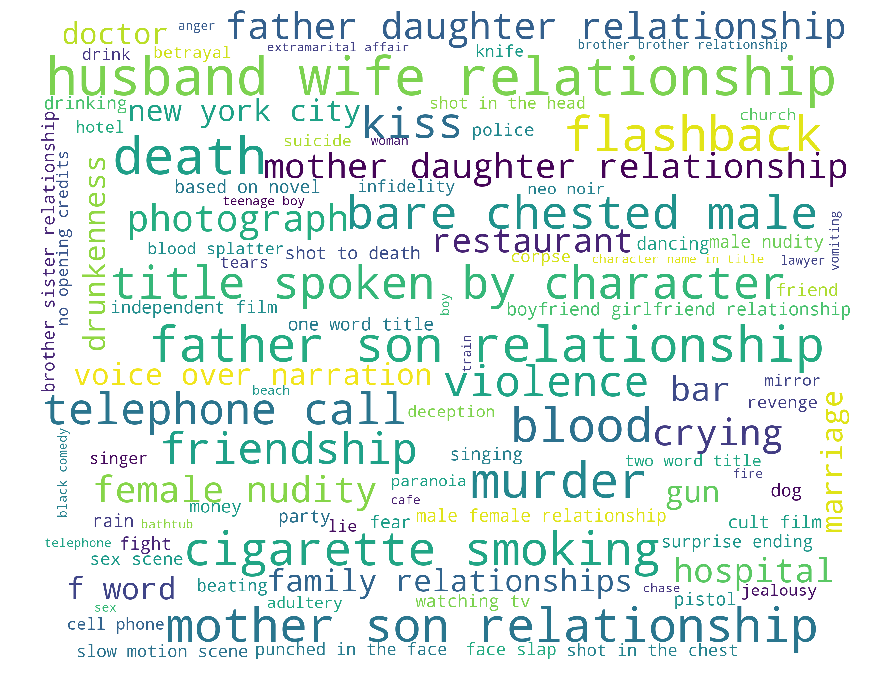

In [74]:
from wordcloud import WordCloud

def kw_wordcloud_draw(y, x, out=0, color = 'black'):
    indexes = np.where(np.array(y)==out)[0].tolist() #get the indexes for either true or false outcome
    phrases = [x[i] for i in indexes] #select the keyword phrases related with either true or false outcome
    whole = [item for sublist in phrases for item in sublist]
    frequencies = Counter(whole) #dictionary of phrases and their frequency
    wordcloud = WordCloud(background_color=color,width=2500,height=2000, max_words=100).generate_from_frequencies(frequencies)
    plt.figure(1,figsize=(18, 12)) 
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
kw_wordcloud_draw(outcome_l, keywords_lower, out=0, color = 'black')
kw_wordcloud_draw(outcome_l, keywords_lower, out=1, color = 'white')

## Applying Bag of Words model using sklearn's CountVectorizer to convert the list of keywords into matrixes of unique word counts and preparing to fit the data on Logistic Regression model
#### Each sample is be represented as a sparse matrix shaped (993, 17349). The rows being length of sample size(there are 993 movies that have over 10 keywords assigned) and columns being unique word count. Each word found by the analyzer during the fit is assigned a unique integer index corresponding to a column in the resulting matrix.

In [131]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression

X_keywords = [' '.join(i) for i in keywords_lower] 

vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(X_keywords)
keywords_asvectors = vectorizer.transform(X_keywords)
tfidf = TfidfTransformer()
keywords_tfidf_vecs = tfidf.fit_transform(keywords_asvectors)

print(keywords_asvectors.shape)

X_kwyrods_train, X_keywords_test, Ykw_train, Ykw_test = train_test_split(keywords_tfidf_vecs, np.array(outcome_l), test_size=0.2)

classifier = LogisticRegression()
classifier.fit(X_kwyrods_train, Ykw_train)
prediction = classifier.predict(X_keywords_test)
 
print(classification_report(Ykw_test,prediction))

(993, 17349)
              precision    recall  f1-score   support

           0       0.66      0.51      0.57       106
           1       0.56      0.70      0.62        93

   micro avg       0.60      0.60      0.60       199
   macro avg       0.61      0.60      0.60       199
weighted avg       0.61      0.60      0.60       199



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Based on the movie keywords provided by imdb, sklearn Logistic regression algorithm can distinguish positive sentiment from negative sentiment with only 60% accuracy
### At this point it was decided to take a look into critic's reviews. Therefore web scraping for new data started taking place
